## <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea">Assignment 2: AirBnB</span>

&nbsp;

<p align="center" style="font-family: Arial;color:#0e92ea;font-size:1em;">
Exploring pricing models that can effectively predict the Rent for accommodation and can help hosts, travelers, and also the business in devising profitable strategies.
    
</p>

##  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Contents:</span>

<ol style="font-family: Arial;color:#0e92ea;font-size:1em;">
    <li>Data Overview</li>
    <li>EDA and Data Processing</li>
    <li>Outlier Treatment</li>
    <li>Model building and Evaluation</li>
    <li>Conclusions</li>
</ol>

####  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Setup (Import Modules):

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

warnings.filterwarnings('ignore')                                       # Ignore/Do not display warnings

main_data = pd.read_csv('AirBnB.csv')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

sns.set(color_codes=False)                                              # Displays charts with background colors
%matplotlib inline

default_color_palette = ["#03A9F4","#7C4DFF", "#FF5252", "#D50000", "#FF6F00", "#0288D1", "#7C4DFF"]
stats_colors = {'Mean':'#D50000', 'Mode':'#FF3D00', 'Median':'#2962FF'} # Set standard colors for mean, mode and median to use accross entire notebook

####  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> 1. Data Overview:
    
<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#0e92ea"> General Observations:
<ul>
    <li>The data is made up of 74111 rows and 11 columns.</li>
    <li>There isnt a big number of nulls so we can drop null rows.</li>
</ul>

In [2]:
print(f"Rows : {main_data.shape[0]} x Columns : {main_data.shape[1]}")

Rows : 74111 x Columns : 11


In [3]:
'''
Input:
Pandas DataFrame

Output:
Displays DataFrame structure 
(columns, nulls and non nulls counts and percentage highlighing columns with most number of nulls)

Retunrs:
N/A
'''
def info(dataFrame):
    nulls_series             = dataFrame.isna().sum()         # Get a series counting number of empty values for each column
    nonnulls_series          = dataFrame.notnull().sum()      # Get a series counting number of non empty valuesfor each column 
    nulls_percentage         = ((nulls_series * 100)/(nulls_series + nonnulls_series)).astype(float)
    column_datatypes         = dataFrame.dtypes               # Get a series containing data types for each column 

    nulls_count_df = pd.concat(
        [nulls_series, nonnulls_series, nulls_percentage, column_datatypes],
        axis=1,
        keys=["Nulls", "Non-Nulls","Nulls %", "Type"], 
        sort=True)
    cm = sns.light_palette("red", as_cmap=True)
    display(nulls_count_df.style.background_gradient(cmap=cm, subset=pd.IndexSlice[:, ['Nulls %']]).format(formatter={('Nulls %'): "{:.2f}%"}))    

In [4]:
info(main_data)

,Nulls,Non-Nulls,Nulls %,Type
accommodates,3,74108,0.00%,float64
bathrooms,203,73908,0.27%,float64
bedrooms,92,74019,0.12%,float64
beds,131,73980,0.18%,float64
cancellation_policy,8,74103,0.01%,object
cleaning_fee,4,74107,0.01%,object
id,0,74111,0.00%,int64
instant_bookable,0,74111,0.00%,object
log_price,0,74111,0.00%,float64
review_scores_rating,16722,57389,22.56%,float64


In [5]:
# Modify the main dataframe by dropping nulls and display the results
main_data['bathrooms'].fillna(main_data['bathrooms'].mean())
main_data['bedrooms'].fillna(main_data['bedrooms'].mean())
main_data['beds'].fillna(main_data['beds'].mean())
main_data.dropna(inplace=True)

In [6]:
info(main_data)

,Nulls,Non-Nulls,Nulls %,Type
accommodates,0,57119,0.00%,float64
bathrooms,0,57119,0.00%,float64
bedrooms,0,57119,0.00%,float64
beds,0,57119,0.00%,float64
cancellation_policy,0,57119,0.00%,object
cleaning_fee,0,57119,0.00%,object
id,0,57119,0.00%,int64
instant_bookable,0,57119,0.00%,object
log_price,0,57119,0.00%,float64
review_scores_rating,0,57119,0.00%,float64


In [7]:
np.random.seed(1)
main_data.sample(n=10)

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
52048,5456061,Entire home/apt,2.0,1.0,strict,True,t,87.0,1.0,1.0,5.298317
60050,7578455,Private room,2.0,1.0,strict,False,t,94.0,1.0,1.0,4.174387
11784,11490167,Entire home/apt,2.0,1.0,moderate,True,t,98.0,1.0,1.0,4.248495
68535,11574820,Shared room,1.0,1.0,flexible,False,f,83.0,1.0,1.0,2.708050
45511,3093469,Private room,2.0,1.0,moderate,True,t,99.0,1.0,1.0,4.248495
18041,8370658,Shared room,1.0,1.0,strict,True,f,100.0,1.0,1.0,3.912023
13181,16733827,Private room,3.0,1.0,moderate,False,f,95.0,1.0,2.0,4.762174
7225,17882017,Private room,2.0,1.0,strict,True,f,96.0,1.0,1.0,4.317488
37851,726657,Entire home/apt,3.0,1.0,strict,True,t,93.0,2.0,2.0,5.273000
810,9219613,Private room,2.0,1.0,moderate,True,t,96.0,1.0,1.0,4.499810


####  <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea"> Check for and delete Duplicates
<ul>
    <li>Modify the main data dataframe by dropping the id column as it will make every row unique.</li>
    <li>Use the modified dataframe to count number of duplicates.</li>
</ul>

In [8]:
main_data.drop("id", axis=1, inplace=True)
main_data.duplicated().sum()

13485

In [9]:
# Count number of unique items for each column
main_data[main_data.duplicated(keep=False)].nunique(axis=0)

room_type                 3
accommodates             12
bathrooms                10
cancellation_policy       3
cleaning_fee              2
instant_bookable          2
review_scores_rating     30
bedrooms                  5
beds                      9
log_price               214
dtype: int64

In [10]:
main_data[main_data.duplicated(keep=False)]

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
5,Private room,2.0,1.0,strict,True,t,100.0,1.0,1.0,4.442651
7,Entire home/apt,2.0,1.0,moderate,True,f,93.0,1.0,1.0,4.787492
8,Private room,2.0,1.0,moderate,True,f,99.0,1.0,1.0,4.787492
9,Private room,2.0,1.0,moderate,True,t,90.0,1.0,1.0,3.583519
...,...,...,...,...,...,...,...,...,...,...
74094,Private room,2.0,1.0,strict,True,f,86.0,1.0,1.0,3.688879
74096,Private room,2.0,1.0,flexible,False,f,60.0,1.0,1.0,3.912023
74100,Private room,2.0,1.0,strict,True,f,93.0,1.0,1.0,4.605170
74103,Entire home/apt,2.0,1.0,moderate,True,f,98.0,1.0,1.0,5.135798


<p>Variation in the log price could be be becuase of a number of factors / variables not captured in the data, like Location, proximity to things like beach, Special Events, Special Amenities, High Season ect. But since we do not have that data in hand it would be safe to build a model that will predict the price with the given columns, so dropping the duplicated rows would make sense.</p>

In [11]:
# Deletes duplicates leaving the unique rows in each set of duplicates
main_data = main_data[main_data.duplicated(keep=False)].drop_duplicates()

In [12]:
main_data.duplicated().sum()

0

In [13]:
info(main_data)

,Nulls,Non-Nulls,Nulls %,Type
accommodates,0,6097,0.00%,float64
bathrooms,0,6097,0.00%,float64
bedrooms,0,6097,0.00%,float64
beds,0,6097,0.00%,float64
cancellation_policy,0,6097,0.00%,object
cleaning_fee,0,6097,0.00%,object
instant_bookable,0,6097,0.00%,object
log_price,0,6097,0.00%,float64
review_scores_rating,0,6097,0.00%,float64
room_type,0,6097,0.00%,object


In [14]:
main_data.head()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
5,Private room,2.0,1.0,strict,True,t,100.0,1.0,1.0,4.442651
7,Entire home/apt,2.0,1.0,moderate,True,f,93.0,1.0,1.0,4.787492
8,Private room,2.0,1.0,moderate,True,f,99.0,1.0,1.0,4.787492
9,Private room,2.0,1.0,moderate,True,t,90.0,1.0,1.0,3.583519


####  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> 2. EDA and Data Processing:
<ul>
    <li>Updated cancellation_policy and room_type from object to categorial to allow the model to generate quality analysis on the data.</li>
    <li>Fixed instant_bookable column from using string based bool values and updated the type also for quality annalysis.</li>
</ul>

In [15]:
'''
Input:
Pandas DataFrame

Output:
Go through each column and preach the name of the column and the unique values for that column.

Retunrs:
N/A
'''
def GetColUniqueValues(col_dtype):
    df = main_data.select_dtypes(include=[col_dtype])
    for col in df:
        print(f"{col} \t: {df[col].unique().tolist()}")

In [16]:
'''
Fix categirial Types and Display unique values for each categorial column.
'''
main_data['cancellation_policy']=main_data['cancellation_policy'].astype("category")
main_data['room_type']=main_data['room_type'].astype("category")

GetColUniqueValues('category')

room_type 	: ['Entire home/apt', 'Private room', 'Shared room']
cancellation_policy 	: ['strict', 'moderate', 'flexible']


In [17]:
'''
Fix bool Types and Display unique values for each column.
'''
main_data.instant_bookable.replace("f", False, inplace=True)
main_data.instant_bookable.replace("t", True, inplace=True)
main_data['instant_bookable']=main_data['instant_bookable'].astype("bool")
main_data['cleaning_fee']=main_data['cleaning_fee'].astype("bool")

GetColUniqueValues('bool')

cleaning_fee 	: [True, False]
instant_bookable 	: [False, True]


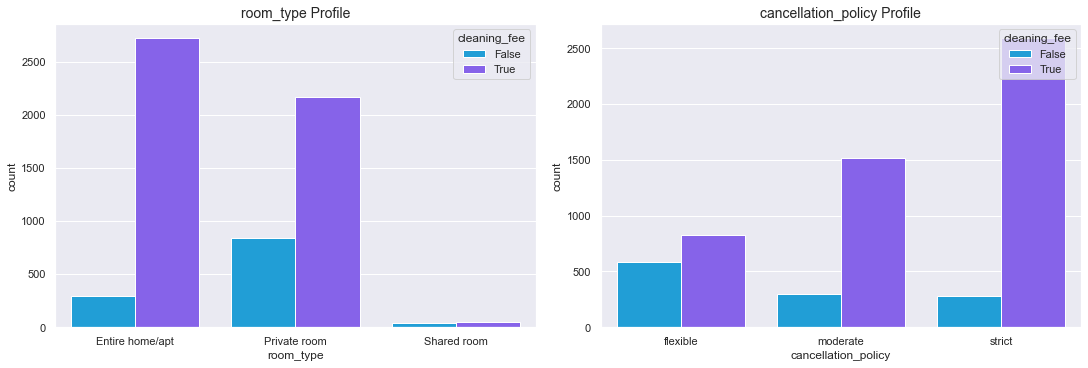

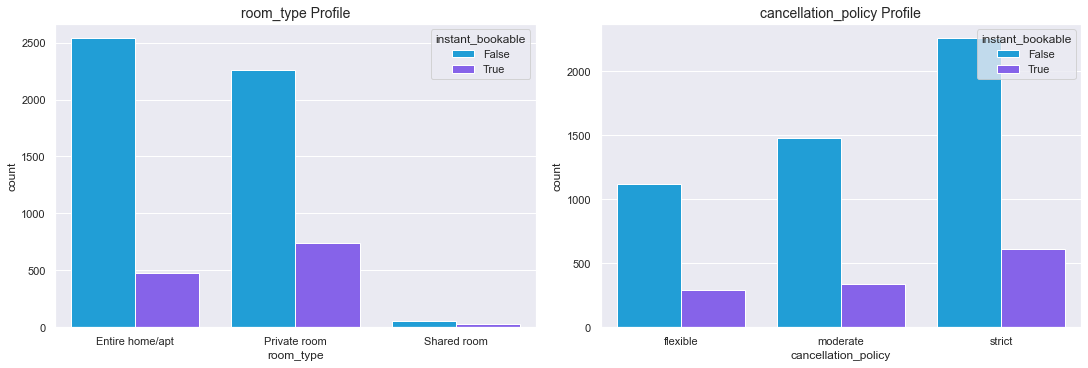

In [18]:
'''
Input:
Axis, column name/x-axis, hue name

Output:
Displays a count plot.

Retunrs:
N/A
'''
def CountPlot(ax, x_axis, hue_name):
    ax = sns.countplot( 
        data=main_data,
        x=main_data[x_axis],
        hue=hue_name,
        palette=default_color_palette,
        ax=ax)
    ax.set_title(x_axis + ' Profile', fontsize=14)
    ax.legend(loc='upper right', title=hue_name)



col_names = main_data.select_dtypes(include=['category']).columns.tolist()
hue_names = main_data.select_dtypes(include=['bool']).columns

for hue_name in hue_names:
    fig, axs = plt.subplots(
        nrows=1,
        ncols=2,
        figsize=(15,5),
        constrained_layout=True)
    index = 0

    for ax in axs.flat:
        CountPlot(ax, col_names[index], hue_name)
        index = index + 1
    


In [19]:
info(main_data)

,Nulls,Non-Nulls,Nulls %,Type
accommodates,0,6097,0.00%,float64
bathrooms,0,6097,0.00%,float64
bedrooms,0,6097,0.00%,float64
beds,0,6097,0.00%,float64
cancellation_policy,0,6097,0.00%,category
cleaning_fee,0,6097,0.00%,bool
instant_bookable,0,6097,0.00%,bool
log_price,0,6097,0.00%,float64
review_scores_rating,0,6097,0.00%,float64
room_type,0,6097,0.00%,category


In [20]:
main_data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
room_type,6097,3,Entire home/apt,3011,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accommodates,6097.0,NaN,NaN,NaN,2.430704,1.145642,1.0,2.0,2.0,3.0,16.0
bathrooms,6097.0,NaN,NaN,NaN,1.074381,0.29722,0.0,1.0,1.0,1.0,8.0
cancellation_policy,6097,3,strict,2871,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cleaning_fee,6097,2,True,4929,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instant_bookable,6097,2,False,4858,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_scores_rating,6097.0,NaN,NaN,NaN,95.80105,5.321915,40.0,94.0,97.0,100.0,100.0
bedrooms,6097.0,NaN,NaN,NaN,1.019846,0.485789,0.0,1.0,1.0,1.0,4.0
beds,6097.0,NaN,NaN,NaN,1.272101,0.597126,1.0,1.0,1.0,1.0,10.0
log_price,6097.0,NaN,NaN,NaN,4.612726,0.535596,2.70805,4.248495,4.59512,5.003946,7.090077


In [21]:
main_data.describe(include=["bool"]).T

,count,unique,top,freq
cleaning_fee,6097,2,True,4929
instant_bookable,6097,2,False,4858


In [22]:
'''
Input:
Axis, column name/x-axis, hue name

Output:
Displays a count plot.

Retunrs:
N/A
''' 
def HistBoxplot(box_chart_ax, hist_chart_ax, x_axis):
    sns.boxplot(
        data=main_data,
        x=main_data[x_axis],
        showmeans=True,
        ax=box_chart_ax)
    
    sns.histplot(
        data=main_data,
        x=main_data[x_axis],
        kde=True,
        ax=hist_chart_ax)
    
    hist_chart_ax.axvline(main_data[x_axis].mean(),                 # Get the mean of the values in the given column and draw a vertical line that cuts the chart on the mean value 
               color=stats_colors['Mean'],                                  # Use on of the colors predefined on this notebook
               label='Mean',                                                # Set the label to be diplayed on the legend
               linestyle="dashed");                                         # Make the line have dashes
    
    hist_chart_ax.axvline(main_data[x_axis].median(),               # Plot the median line on the chart.
               color=stats_colors['Median'],                                # Use on of the colors predefined on this notebook
               label='Median',                                              # Set the label to be diplayed on the legend
               linestyle="dashed");                                         # Make the line have dashes
    
    hist_chart_ax.axvline(main_data[x_axis].mode()[0],              # Plot the mode line on the chart.
               color=stats_colors['Mode'],                                  # Use on of the colors predefined on this notebook 
               label='Mode',                                                # Set the label to be diplayed on the legend
               linestyle="dashed");                                         # Make the line have dashes
    
    hist_chart_ax.legend(loc='upper right')


In [23]:
def PlotHistBoxGrid():
    col_names = main_data.select_dtypes(include=['float', 'int']).columns.tolist()
    print(col_names)

    col_index = 0
    for r in range(0, int(len(col_names)), 3):
        fig, (box, hist) = plt.subplots(
            nrows=2,                                                                # Number of rows of the grid
            ncols=3,                                                                # Number of columns of the grid.
            figsize=(15,4),
            gridspec_kw={"height_ratios" : (0.25,0.5)},
            constrained_layout=True)

        for index in range(0, 3):
            if col_index < int(len(col_names)):
                HistBoxplot(box.flat[index], hist.flat[index], col_names[col_index])
            col_index += 1

['accommodates', 'bathrooms', 'review_scores_rating', 'bedrooms', 'beds', 'log_price']


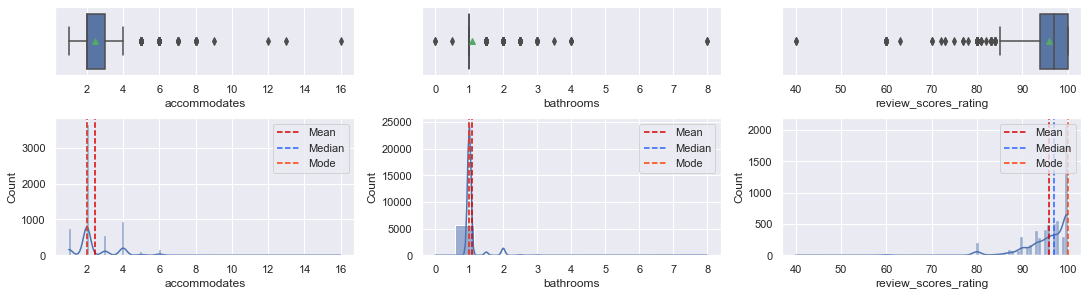

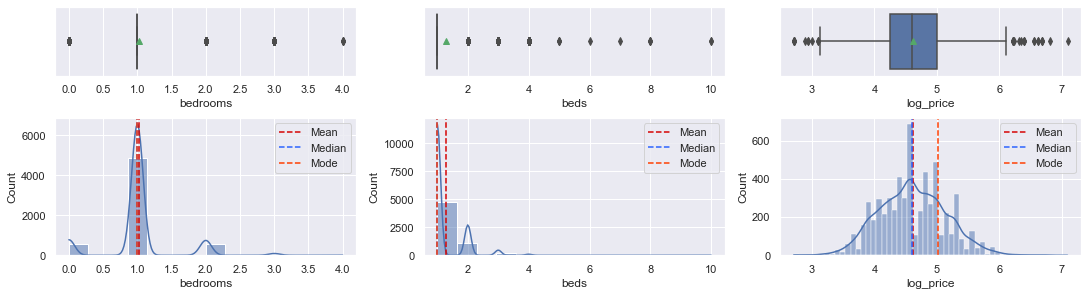

In [24]:
PlotHistBoxGrid()

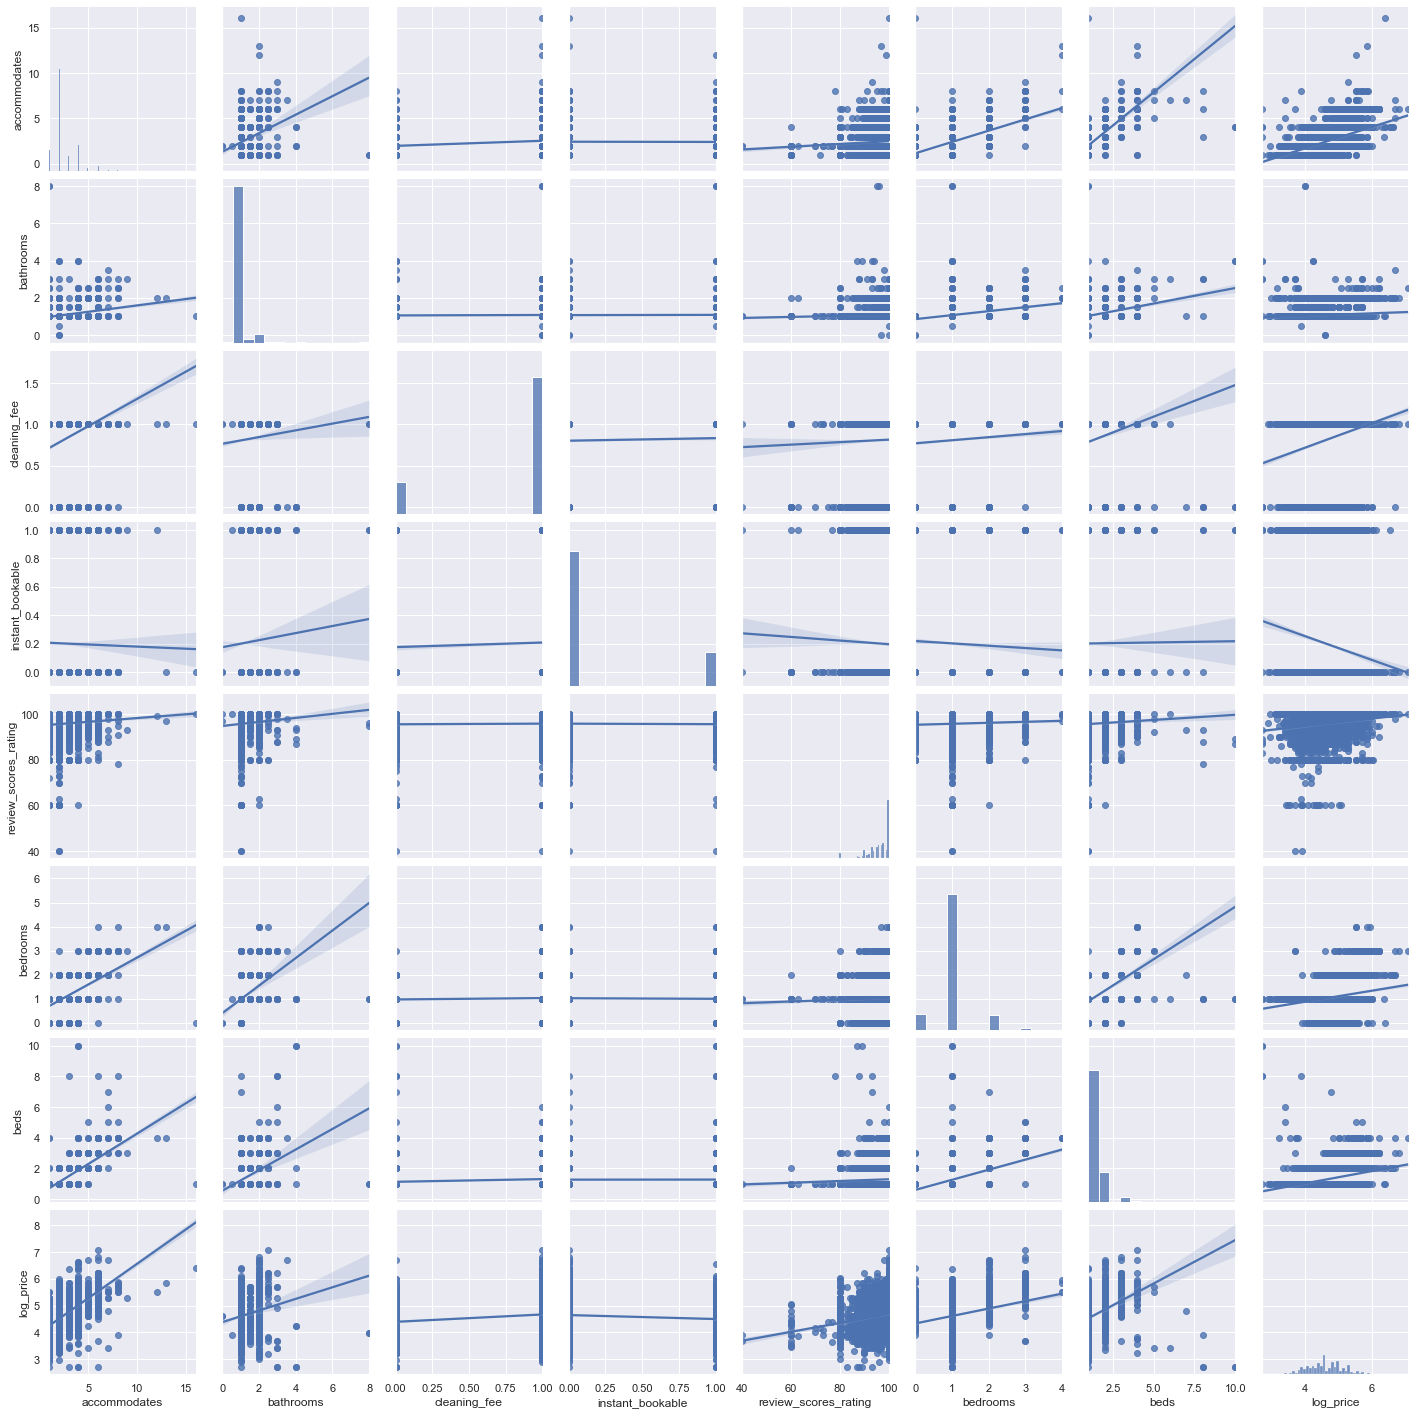

In [25]:
sns.pairplot(data=main_data, kind="reg")

<ul>
    <li>The following columns are highly skewed and a lot of outliers, and might cause issues with the model: 'accommodates', 'bathrooms', 'review_scores_rating',  and 'beds'</li>
</ul>

<ul>
    <li>Convert categorial columns to number to help prepare for model building.</li>
    <li>Delete one  extra dummy columns for each category.</li>
</ul>

In [26]:
main_data = pd.get_dummies(main_data, columns=['room_type', 'cancellation_policy'])
main_data.drop(['room_type_Shared room', 'cancellation_policy_strict'], inplace=True, axis = 1)
main_data.head()

,accommodates,bathrooms,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price,room_type_Entire home/apt,room_type_Private room,cancellation_policy_flexible,cancellation_policy_moderate
0,3.0,1.0,True,False,100.0,1.0,1.0,5.010635,1,0,0,0
5,2.0,1.0,True,True,100.0,1.0,1.0,4.442651,0,1,0,0
7,2.0,1.0,True,False,93.0,1.0,1.0,4.787492,1,0,0,1
8,2.0,1.0,True,False,99.0,1.0,1.0,4.787492,0,1,0,1
9,2.0,1.0,True,True,90.0,1.0,1.0,3.583519,0,1,0,1


####  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> 3. Outlier Treatment:

In [27]:
'''
Input:
Column name

Output:
A series containing interquatile range values

Retunrs:
A series containing interquatile range values
''' 
def Get_IQR(col_name):
    quartiles = np.quantile(main_data[col_name][main_data[col_name].notnull()], [.2, .75])
    power_4iqr = 4 * (quartiles[1] - quartiles[0])
    print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {power_4iqr}')
    outlier_powers = main_data.loc[np.abs(main_data[col_name] - main_data[col_name].median()) > power_4iqr, col_name]
    print(outlier_powers.array) 
    
    return quartiles

<ul>
    <li>Replace outliers with median.</li>
</ul>

In [28]:
col_names = ['accommodates', 'bathrooms', 'review_scores_rating']

for col_name in col_names:
    print(f"\n\n==========================={col_name}====================\n")
    main_data[col_name] = np.where(
        main_data[col_name] < Get_IQR(col_name)[0],
        main_data[col_name].median(),
        main_data[col_name])
    print(f"\n\n==========================={col_name}====================\n")



===========================accommodates====================

Q1 = 2.0, Q3 = 3.0, 4*IQR = 4.0
<PandasArray>
[ 7.0, 16.0,  7.0,  8.0,  7.0,  8.0, 12.0,  7.0,  7.0,  7.0,  8.0,  8.0,  7.0,
  8.0,  7.0,  8.0,  8.0,  8.0,  9.0,  7.0, 13.0,  8.0]
Length: 22, dtype: float64


===========================accommodates====================



===========================bathrooms====================

Q1 = 1.0, Q3 = 1.0, 4*IQR = 0.0
<PandasArray>
[2.0, 2.0, 1.5, 2.0, 4.0, 1.5, 1.5, 2.0, 2.0, 2.0,
 ...
 1.5, 3.0, 2.0, 2.0, 1.5, 2.0, 2.0, 2.0, 1.5, 2.0]
Length: 486, dtype: float64


===========================bathrooms====================



===========================review_scores_rating====================

Q1 = 93.0, Q3 = 100.0, 4*IQR = 28.0
<PandasArray>
[60.0, 60.0, 40.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0,
 60.0, 60.0, 40.0, 60.0, 60.0, 60.0, 60.0, 60.0, 63.0, 60.0]
Length: 23, dtype: float64


===========================review_scores_rating====================



['accommodates', 'bathrooms', 'review_scores_rating', 'bedrooms', 'beds', 'log_price']


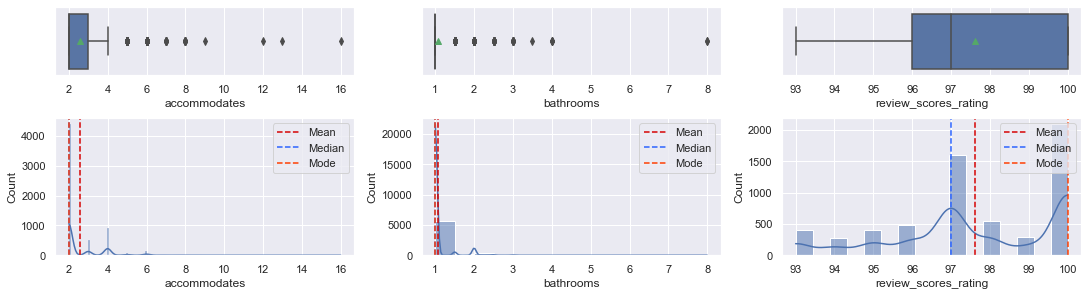

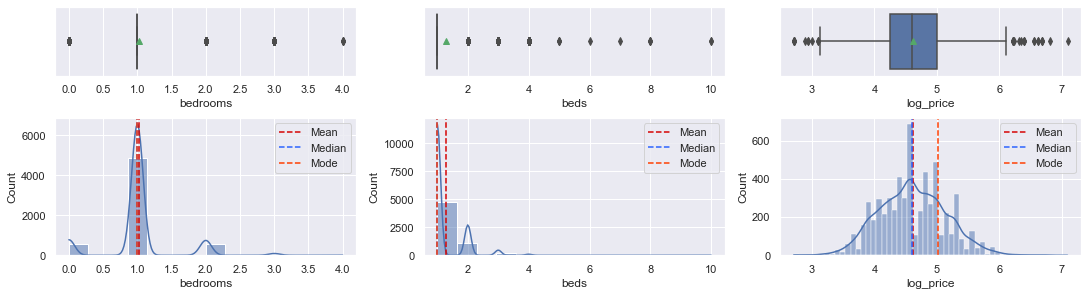

In [29]:
PlotHistBoxGrid()

<AxesSubplot:xlabel='review_scores_rating_log', ylabel='Density'>

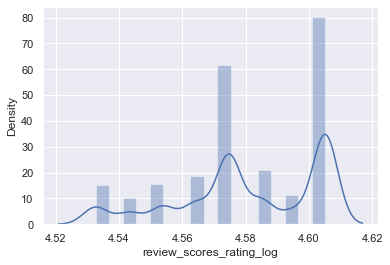

In [30]:
main_data['review_scores_rating_log'] = np.log(main_data['review_scores_rating'])
sns.distplot(main_data["review_scores_rating_log"])

<AxesSubplot:xlabel='beds', ylabel='Count'>

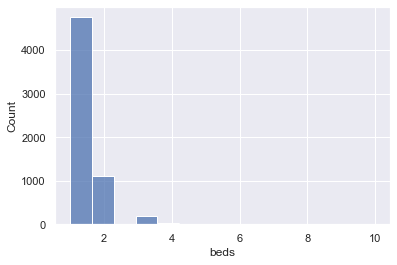

In [31]:
sns.histplot(data=main_data, x="beds")

<AxesSubplot:xlabel='accommodates', ylabel='Count'>

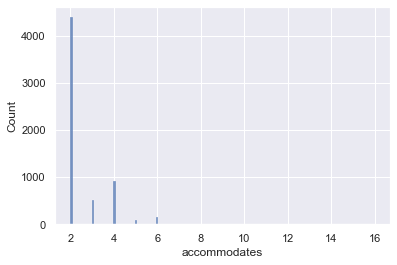

In [32]:
sns.histplot(data=main_data, x="accommodates")

<AxesSubplot:xlabel='bathrooms', ylabel='Count'>

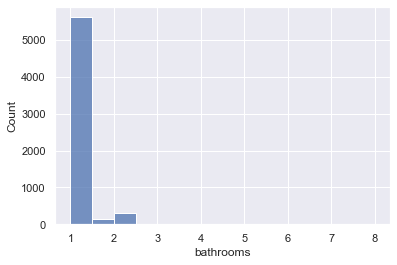

In [33]:
sns.histplot(data=main_data, x="bathrooms")

['accommodates', 'bathrooms', 'review_scores_rating', 'bedrooms', 'beds', 'log_price', 'review_scores_rating_log']


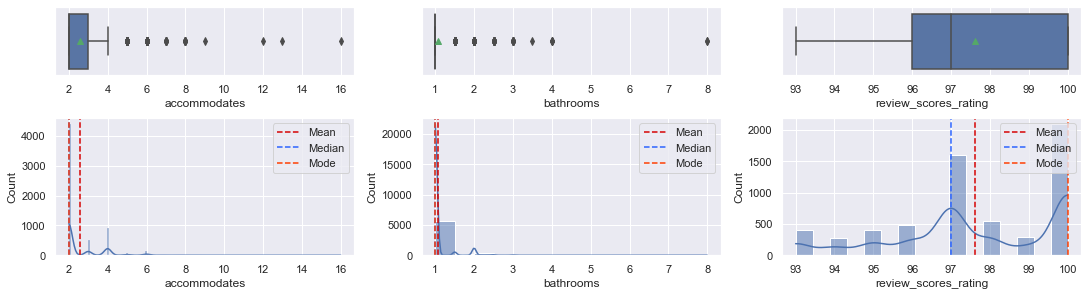

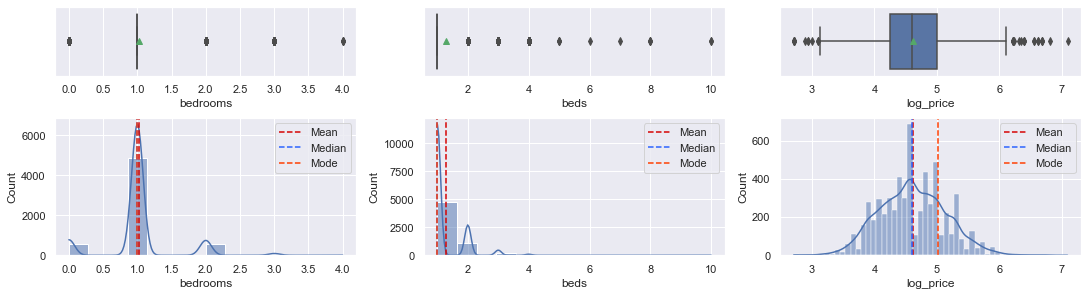

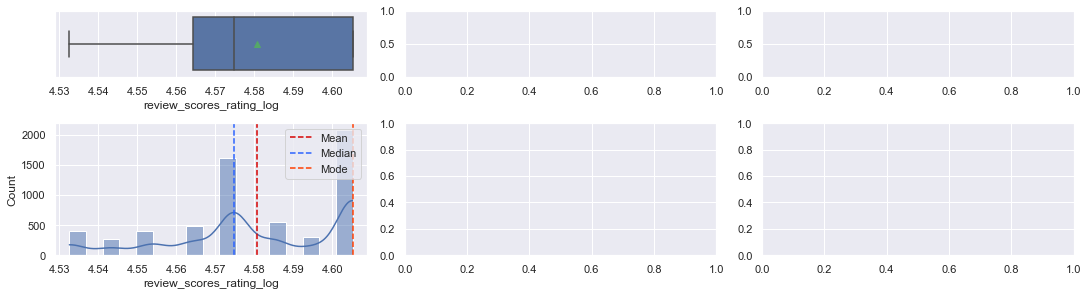

In [34]:
PlotHistBoxGrid()

<ul>
    <li>Review the corrolation between the variables and delete variables</li>
    <li>There isnt any strong corrolation to the log_price and this wil affect the accuracy of the model.</li>
</ul>

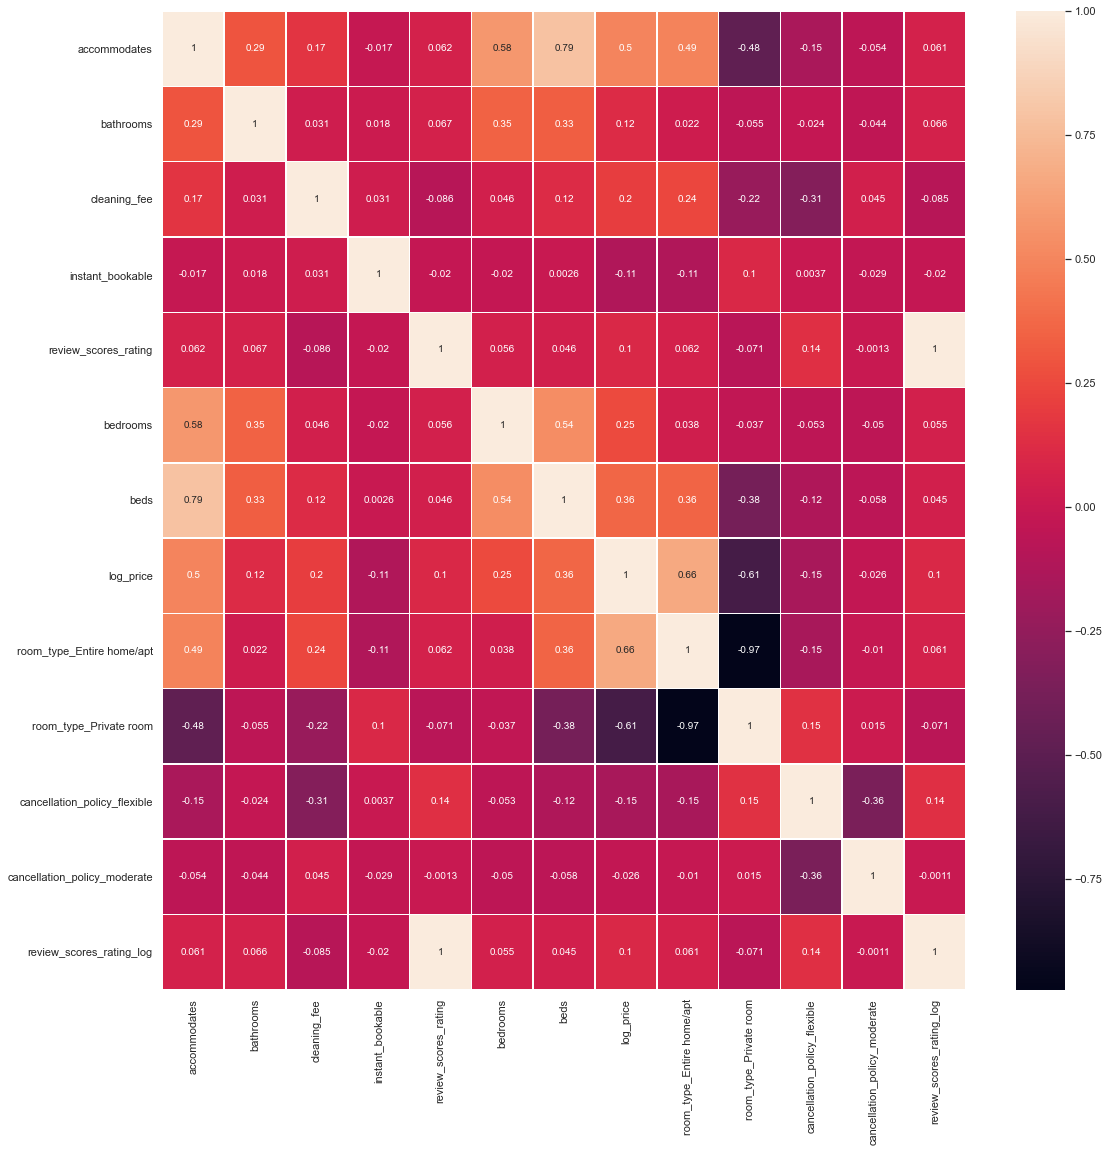

In [35]:
fig, ax = plt.subplots(figsize=(18,18)) 
sns.heatmap(data=main_data.corr(), annot=True, linewidths=.5, ax=ax)
plt.show()

In [36]:
info(main_data)

,Nulls,Non-Nulls,Nulls %,Type
accommodates,0,6097,0.00%,float64
bathrooms,0,6097,0.00%,float64
bedrooms,0,6097,0.00%,float64
beds,0,6097,0.00%,float64
cancellation_policy_flexible,0,6097,0.00%,uint8
cancellation_policy_moderate,0,6097,0.00%,uint8
cleaning_fee,0,6097,0.00%,bool
instant_bookable,0,6097,0.00%,bool
log_price,0,6097,0.00%,float64
review_scores_rating,0,6097,0.00%,float64


####  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> 4. Model Building and Evaluation

In [37]:
Y = main_data['log_price']
X = main_data.drop(['log_price'], axis=1, inplace=False)

In [38]:
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

X.head()

,accommodates,bathrooms,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,room_type_Entire home/apt,room_type_Private room,cancellation_policy_flexible,cancellation_policy_moderate,review_scores_rating_log
0,3.0,1.0,True,False,100.0,1.0,1.0,1,0,0,0,4.605170
5,2.0,1.0,True,True,100.0,1.0,1.0,0,1,0,0,4.605170
7,2.0,1.0,True,False,93.0,1.0,1.0,1,0,0,1,4.532599
8,2.0,1.0,True,False,99.0,1.0,1.0,0,1,0,1,4.595120
9,2.0,1.0,True,True,97.0,1.0,1.0,0,1,0,1,4.574711


In [39]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [40]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(x_train, y_train)

LinearRegression()

In [41]:
coefs = pd.DataFrame(
    np.append(linear_reg_model.coef_, linear_reg_model.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

In [42]:
coefs.sort_values('Coefficients')

,Coefficients
review_scores_rating_log,-66.379718
beds,-0.060285
cancellation_policy_flexible,-0.057947
instant_bookable,-0.040021
cancellation_policy_moderate,-0.031084
cleaning_fee,0.013512
bathrooms,0.075481
accommodates,0.083991
bedrooms,0.170973
room_type_Private room,0.639117


<ul>
    <li>There isnt that much corrolation between the target price and the variables in the given columns, except for small variations noticed between price and room type (especially if it is Entire home/apt) and the number of people/adults the apartment can accomodate.</li>
    <li>We also notice a deccrease or low pricing for other apartment types that are not Entire home/apt and with any cancellation policy added.</li>
     <li>Apartment reviews and number or beds do very little to help with pricing</li>
    <li>Number of beds corrolates with accomodation but does very little to help the model predict the price and could be left out/dropped</li>
</ul>

In [43]:
linear_reg_model.score(x_train, y_train)

0.5350463669524763

In [44]:
linear_reg_model.score(x_test, y_test)

0.5047116177139661

In [45]:
def Get_Adjusted_R_Squared(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2)) * (n - 1) / (n - k -1)
    
def Model_Perf_Analysis(model, predictors, targets):
    predictions = model.predict(predictors)
    predictions = np.exp(predictions)
    targets = np.exp(targets)
    
    r_squred = r2_score(targets, predictions)
    adj_r_squred = Get_Adjusted_R_Squared(predictors, targets, predictions)
    root_mean_sqrd_error = np.sqrt(mean_squared_error(targets, predictions))
    mean_abs_error = mean_absolute_error(targets, predictions)
    mape_sqrd = np.mean(np.abs(targets - predictions) / targets) * 100
    
    df_perf = pd.DataFrame({
        "RMSE": root_mean_sqrd_error,
        "MAE": mean_abs_error,
        "R-Squared": r_squred,
        "Adj_R_Sqaured": adj_r_squred,
        "MAPE": mape_sqrd
    },
    index=[0])
    return df_perf

In [46]:
perf_results = Model_Perf_Analysis(linear_reg_model, x_train, y_train)
perf_results

,RMSE,MAE,R-Squared,Adj_R_Sqaured,MAPE
0,52.926888,33.647381,0.469714,0.468219,30.417004


In [47]:
perf_results = Model_Perf_Analysis(linear_reg_model, x_test, y_test)
perf_results

,RMSE,MAE,R-Squared,Adj_R_Sqaured,MAPE
0,52.70166,33.927883,0.427125,0.423342,30.019077


<ul>
        <li>The model accuracy and root mean square are considerably poor and this might be due to a very high variance in the attributes used to build the models and is not really helpful to have a 50% accurate model.
    </li>
</ul>

####  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> 5. Conclusion

<ul>
    <li>There isnt that much corrolation between the target price and the variables in the given columns, except for small variations noticed between price and room type (especially if it is Entire home/apt) and the number of people/adults the apartment can accomodate.</li>
    <li>We also notice a deccrease or low pricing for other apartment types that are not Entire home/apt and with any cancellation policy added.</li>
     <li>Apartment reviews and number or beds do very little to help with pricing</li>
    <li>Number of beds corrolates with accomodation but does very little to help the model predict the price and could be left out/dropped</li>
</ul>